In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
full_data = pd.read_csv("./data/Titanic/train.csv")

In [7]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
full_data.shape

(891, 12)

In [12]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 2: Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [45]:
survival = pd.DataFrame(full_data["Survived"].value_counts())

In [46]:
survival.index=["Not_survived","Survived"]
survival.rename(columns={"Survived": "Amount people"}, inplace=True)
survival

,Amount people
Not_survived,549
Survived,342


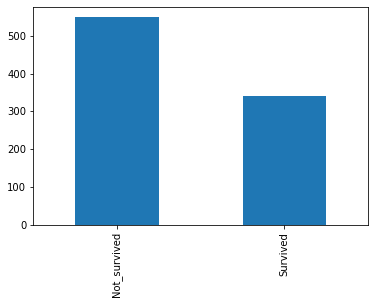

In [44]:
survival.plot.bar(legend=False);

### Step 3: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [52]:
class1_survived = len(full_data[(full_data["Pclass"] == 1) & (full_data["Survived"] == 1)]) / len(full_data[full_data["Pclass"] == 1])
round(class1_survived, 2)

0.63

In [61]:
full_data[full_data["Pclass"] == 1].groupby(["Sex", "Survived"]).size()

Sex     Survived
female  0            3
        1           91
male    0           77
        1           45
dtype: int64

### Step 4: Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [100]:
pclass_sex = full_data.groupby(["Pclass", "Sex"]).size()
pclass_sex

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

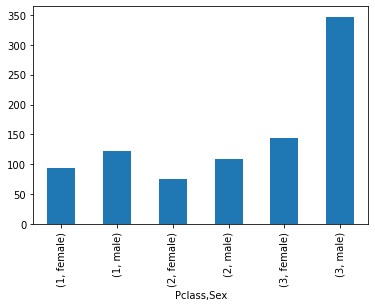

In [79]:
pclass_sex.plot.bar(legend=False);

In [120]:
# Create a grouped bar plot

df_pclass_sex = pclass_sex.to_frame(name="Amount of people")
df_pclass_sex = df_pclass_sex.reset_index()

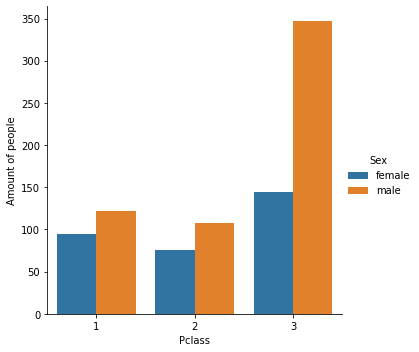

In [122]:
sns.catplot(x = "Pclass",       # x variable name
            y = "Amount of people",       # y variable name
            hue = "Sex",  # group variable name
            data = df_pclass_sex,     # dataframe to plot
            kind = "bar");

### Step 5: Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

In [126]:
subset_age_survived = full_data[full_data["Survived"] == 1]
subset_age_not_survived = full_data[full_data["Survived"] == 0]

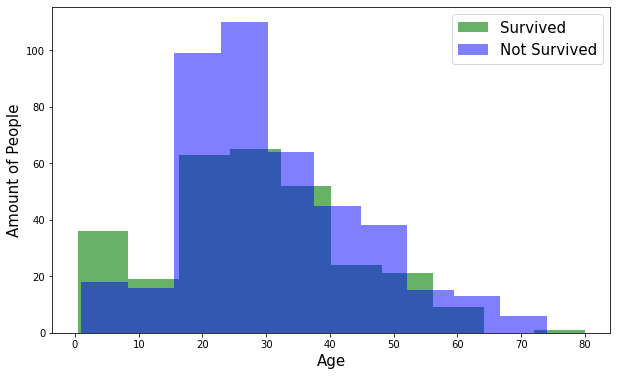

In [136]:
#Years 1950 and 2015 in one graph to stress the develpment

fig, ax = plt.subplots(figsize = (10,6))

ax.hist(subset_age_survived["Age"], color='green', label='Survived', alpha=0.6)
ax.hist(subset_age_not_survived["Age"], color='blue', label='Not Survived', alpha=0.5)

ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Amount of People', fontsize=15)

ax.legend(fontsize=15);

### Step 6: Calculate the average age for survived and drowned passengers separately.

In [154]:
survived_age = round(full_data.groupby(["Survived"])["Age"].mean(), 2)
survived_age.index=["Not_survived","Survived"]

print(f"People that not survived where on average {survived_age[0]} years old, \
while people that survived where on average {survived_age[1]} years old.")

People that not survived where on average 30.63 years old, while people that survived where on average 28.34 years old.


### Step 7: Replace missing age values by the mean age.

In [160]:
amount_of_nan_before = full_data["Age"].isna().sum()

print(f"The original 'Age' column consits of {amount_of_nan_before} NaN-values")

The original 'Age' column consits of 177 NaN-values


In [165]:
full_data["Age"].fillna(full_data["Age"].mean(), inplace=True)
amount_of_nan_after = full_data["Age"].isna().sum()
print(f"The new 'Age' column consits of {amount_of_nan_after} NaN-values")

The new 'Age' column consits of 0 NaN-values


### Step 7: Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [184]:
pclass_sex_survived = full_data.groupby(["Pclass", "Sex", "Survived"]).size()
pclass_sex_survived = pclass_sex_survived.to_frame("Amount of people").reset_index()

In [185]:
pclass_sex_survived

,Pclass,Sex,Survived,Amount of people
0,1,female,0,3
1,1,female,1,91
2,1,male,0,77
3,1,male,1,45
4,2,female,0,6
5,2,female,1,70
6,2,male,0,91
7,2,male,1,17
8,3,female,0,72
9,3,female,1,72
